In [7]:
import nltk
nltk.download("all")

[nltk_data] Error loading all: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [1]:
!pip install stop-words

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32919 sha256=ee8b43ed863839b53cc6d7900f28593e1e04d8abe1085202ed5f295c262e72b9
  Stored in directory: c:\users\asharf\appdata\local\pip\cache\wheels\8f\a5\51\a5405e1da5d178491b79d12cc81b6cb9bb14fe2c8c632eba70
Successfully built stop-words


In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from nltk.corpus import stopwords
from stop_words import get_stop_words
# from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()
import string
stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words.extend(nltk_words)

In [89]:
text_df = pd.read_csv("/content/SMSSpamCollection",delimiter = "\t", encoding='latin-1',names = ["Target","Message"])
text_df.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Target   5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Check Nulls

In [91]:
print("Number of Nulls :")
text_df.isna().sum()

Number of Nulls :


,0
Target,0
Message,0


### Check and Removing Duplicats

In [92]:
print("Number of Duplicats :",text_df.duplicated().sum())
print("Removing Duplicats ......")
text_df = text_df.drop_duplicates()
print("Number of Duplicats :",text_df.duplicated().sum())

Number of Duplicats : 403
Removing Duplicats ......
Number of Duplicats : 0


### Check of Balancing Data

In [93]:
text_df['Target'].unique()

array(['ham', 'spam'], dtype=object)

<Axes: xlabel='Target', ylabel='count'>

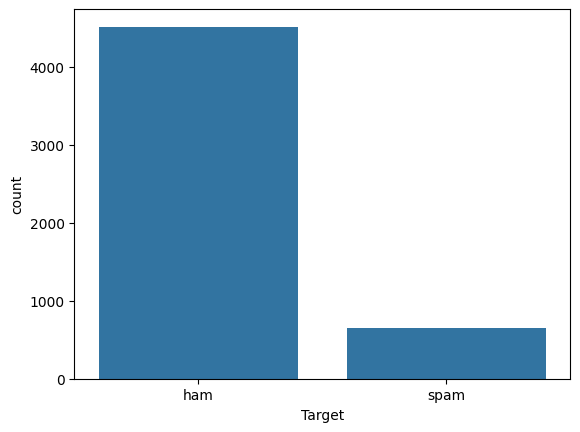

In [94]:
sns.countplot(x ='Target', data = text_df)

### Ecoding Target

In [95]:
text_df['Target'] = text_df['Target'].apply(lambda x: 0 if x == 'ham'else 1)
text_df.head()


,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Show Samples of texts to find out required preprocessing steps

In [ ]:
for i in range(5):
  print(i,text_df['Message'][i])

0 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 Ok lar... Joking wif u oni...
2 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 U dun say so early hor... U c already then say...
4 Nah I don't think he goes to usf, he lives around here though


## Cleaning and Preprocessing

In [ ]:
# 1- Remove @user
# input: sentence
# output: sentence
def remove_user(text):
  # [] for range
  # + one or more
  # | or
  # ^ not
  # \w word
  user = re.compile(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
  clean_text = user.sub(r'',text)
  return clean_text

In [96]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# 2- Remove Punctuation
def remove_punctuation(text):
  without_punctuation ="".join(i for i in text if i not in string.punctuation)
  return without_punctuation

In [ ]:
# 3- Lower Case
def lower_case(text):
  return text.lower()

In [ ]:
# 4- Tokenize Text
# input: sentence
# output: list
def tokenization(text):
  tokens = re.split('W+',text)
  return tokens

In [ ]:
# \d digit
# + one or more
def remove_numbers(text):
  nums = re.compile(r'\d+')
  clean_text = nums.sub(r'',text)
  return clean_text

In [73]:
# 5- Remove Stopwords
def remove_stopwords(text):
  # not_stopword = [i for i in text  if i not in stop_words]
  # return not_stopword

  text =  ' '.join([word for word in text.split() if word not in stop_words])
  return text

In [85]:
# Get Tweets Clean
def preprocess_tweets(text):
  clean_text = lower_case(remove_punctuation(remove_numbers(remove_user(text))))
  # tokenize
  words = remove_stopwords(clean_text)
  words = tokenization(words)

  # stem words
  stemmed_words=[porter_stemmer.stem(word=word) for word in words]
  # print(stemmed_words)
  return ''.join(stemmed_words)

In [83]:
def convert_str(list_text):
  string = ''.join([str(item) for item in list_text])
  return string

In [86]:
text_df['CleanMessage'] = text_df.apply(lambda row: preprocess_tweets(row['Message']), axis = 1)
text_df['Tokens'] = text_df.apply(lambda row: word_tokenize(row['CleanMessage']), axis = 1)
text_df.head(4)

,Target,Message,CleanMessage,Tokens
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]"
